In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import utils

In [120]:
train_data = np.loadtxt(open("data/train_data.csv", "rb"), delimiter=",")
train_labels = np.loadtxt(open("data/train_labels.csv", "rb"), delimiter=",")
test_data = np.loadtxt(open("data/test_data.csv", "rb"), delimiter=",")

In [121]:
scaler = StandardScaler()
train_data_stand = scaler.fit_transform(train_data)
test_data_stand = scaler.fit_transform(test_data)

In [122]:
LogReg = LogisticRegression(multi_class='ovr', penalty='l1',tol=0.1)

In [123]:
LogReg.fit(train_data_stand, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)

In [124]:
LogReg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)

In [125]:
LogReg.score(train_data_stand,train_labels)

0.74329589731835888

In [126]:
pred = LogReg.predict(test_data_stand)
pred_log = LogReg.predict_log_proba(test_data_stand)

In [14]:
utils.make_submission(pred, 'LogReg')

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve


# neural network

In [187]:
nn = MLPClassifier(alpha=0.001, hidden_layer_sizes = (250,200,180, 150, 120), max_iter = 50000, activation = 'tanh', verbose = 'True', solver='adam', learning_rate='adaptive', early_stopping=True, validation_fraction=0.25, tol=1e-4 )

In [188]:
nn

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(250, 200, 180, 150, 120),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=50000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.25, verbose='True', warm_start=False)

In [189]:
nn.fit(train_data_stand, train_labels)

Iteration 1, loss = 1.50697507
Validation score: 0.614115
Iteration 2, loss = 1.06804809
Validation score: 0.611366
Iteration 3, loss = 0.91943646
Validation score: 0.632447
Iteration 4, loss = 0.81612972
Validation score: 0.624198
Iteration 5, loss = 0.74084340
Validation score: 0.626031
Iteration 6, loss = 0.66069909
Validation score: 0.609533
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(250, 200, 180, 150, 120),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=50000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.25, verbose='True', warm_start=False)

In [190]:
y_pred = nn.predict(train_data_stand)

In [191]:
nn.score(train_data_stand,train_labels)

0.71991748796699517

In [192]:
sum(np.round(nn.predict(train_data_stand)) == train_labels)

3141

In [193]:
sum(np.round(y_pred) == train_labels) / len(train_labels)

0.71991748796699517

In [194]:
sum(np.round(y_pred) == train_labels)

3141

In [134]:
nn_pred = nn.predict(test_data_stand)
nn_pred_log = nn.predict_log_proba(test_data_stand)

In [221]:
X_train, X_val, y_train, y_val = train_test_split(
    train_data_stand, train_labels, test_size=0.25, random_state=42)

In [222]:
nn2 = MLPClassifier(alpha=0.00000001, hidden_layer_sizes = (250,200,180, 150, 120), max_iter = 50000, activation = 'tanh', verbose = 'True', solver='adam', learning_rate='adaptive', early_stopping=True, validation_fraction=0.25, tol=1e-4 )

In [223]:
nn2.fit(X_train, y_train)

Iteration 1, loss = 1.58634923
Validation score: 0.570905
Iteration 2, loss = 1.11169400
Validation score: 0.596577
Iteration 3, loss = 0.97088135
Validation score: 0.627139
Iteration 4, loss = 0.85143679
Validation score: 0.623472
Iteration 5, loss = 0.76467398
Validation score: 0.627139
Iteration 6, loss = 0.68509233
Validation score: 0.632029
Iteration 7, loss = 0.59934908
Validation score: 0.623472
Iteration 8, loss = 0.51506763
Validation score: 0.618582
Iteration 9, loss = 0.44552502
Validation score: 0.629584
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(250, 200, 180, 150, 120),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=50000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.25, verbose='True', warm_start=False)

In [ ]:
nn2.

In [226]:
sum(nn2.predict(X_val) == y_val)/ len(y_val)

0.63886342804766272

In [225]:
sum(nn2.predict(train_data_stand) == train_labels)/ len(train_labels)

0.73321109328443734

In [227]:
nn3 = MLPClassifier(alpha=0.00000001, hidden_layer_sizes = (250,200,180, 150, 120), max_iter = 50000, activation = 'tanh', verbose = 'True', solver='adam', learning_rate='adaptive', early_stopping=True, validation_fraction=0.25, tol=1e-4 )

In [228]:
nn3.fit(train_data_stand,train_labels)

Iteration 1, loss = 1.51672486
Validation score: 0.620532
Iteration 2, loss = 1.07540857
Validation score: 0.653529
Iteration 3, loss = 0.94060331
Validation score: 0.635197
Iteration 4, loss = 0.83544205
Validation score: 0.656279
Iteration 5, loss = 0.75492389
Validation score: 0.653529
Iteration 6, loss = 0.66541742
Validation score: 0.648029
Iteration 7, loss = 0.60343716
Validation score: 0.640697
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(250, 200, 180, 150, 120),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=50000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.25, verbose='True', warm_start=False)

In [229]:
sum(nn3.predict(train_data_stand) == train_labels)/ len(train_labels)

0.7403162961265185

In [230]:
pred_nn3 = nn3.predict(test_data_stand)
pred_nn3_log = nn3.predict_log_proba(test_data_stand)

In [231]:
utils.make_submission(pred_nn3, 'NN')

array([[ 0.97894976,  0.99735779,  0.        ],
       [ 0.99513243,  0.99043086,  0.98964872]])

In [85]:
train_sizes, train_scores, valid_scores = learning_curve(nn2, train_data_stand, train_labels, train_sizes=[0.66, 0.8])

Iteration 1, loss = 4.28909878
Iteration 2, loss = 2.70760139
Iteration 3, loss = 2.25590931
Iteration 4, loss = 1.94647931
Iteration 5, loss = 1.77618663
Iteration 6, loss = 1.58783244
Iteration 7, loss = 1.36535129
Iteration 8, loss = 1.17427783
Iteration 9, loss = 1.01640419
Iteration 10, loss = 0.82456931
Iteration 11, loss = 0.66671243
Iteration 12, loss = 0.56901756
Iteration 13, loss = 0.48762433
Iteration 14, loss = 0.36836856
Iteration 15, loss = 0.32908717
Iteration 16, loss = 0.35066334
Iteration 17, loss = 0.31212233
Iteration 18, loss = 0.23727481
Iteration 19, loss = 0.17289545
Iteration 20, loss = 0.14416776
Iteration 21, loss = 0.13990831
Iteration 22, loss = 0.11345623
Iteration 23, loss = 0.11714762
Iteration 24, loss = 0.12536829
Iteration 25, loss = 0.11804160
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.50604924
Iteration 2, loss = 2.53492636
Iteration 3, loss = 2.24896132
Iteration 4, loss = 1.945

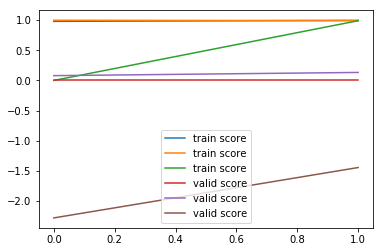

In [87]:
plt.plot(train_scores, label='train score')
plt.plot(valid_scores, label='valid score')
plt.legend()